# MLP testing notebook
I trained the smaller models on a smaller amount of data to find optimum hyperparameters. Once the best settings were found I used this on bigger models trained with more data using a GPU. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import MLPfunctions as mlp
import importlib
from importlib import reload
from sklearn.model_selection import train_test_split

# Create a dataframe from the csv file
dataset = pd.read_csv('HIGGS_train.csv')
# Make the dataset much smaller
dataset_small = dataset.sample(frac=0.1)
# Set aside a validation set
data_val = dataset_small.sample(frac=0.2)
dataset_small.drop(data_val.index, inplace=True)
X_val = data_val.iloc[:, 1:].values
y_val = data_val.iloc[:, 0].values
# Split the data into features and labels
X = dataset_small.iloc[:, 1:].values
y = dataset_small.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Print all the sizes
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train,)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)


(563200, 28)
(140800, 28)
(176000, 28)


Epoch 1/1000, Train Loss: 0.6920670866966248, Test Loss: 0.738484799861908
Epoch 2/1000, Train Loss: 0.7375934720039368, Test Loss: 0.784781813621521
Epoch 3/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 4/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 5/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 6/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 7/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 8/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 9/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 10/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 11/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 12/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 13/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 14/1000, Train Loss: 0.783

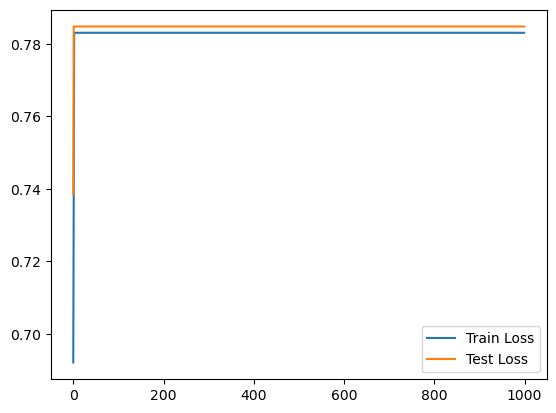

F1:0.6920624540178205
Accuracy:0.529125
Confusion Matrix:
[[    0 82874]
 [    0 93126]]


In [4]:
# Create the model
hidden_size = 50
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .1
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)


Epoch 1/1000, Train Loss: 0.6964541077613831, Test Loss: 0.6961902976036072
Epoch 2/1000, Train Loss: 0.6964044570922852, Test Loss: 0.6961429715156555
Epoch 3/1000, Train Loss: 0.6963553428649902, Test Loss: 0.6960961222648621
Epoch 4/1000, Train Loss: 0.6963067650794983, Test Loss: 0.696049690246582
Epoch 5/1000, Train Loss: 0.6962586641311646, Test Loss: 0.6960037350654602
Epoch 6/1000, Train Loss: 0.6962108612060547, Test Loss: 0.6959580779075623
Epoch 7/1000, Train Loss: 0.696163535118103, Test Loss: 0.6959128975868225
Epoch 8/1000, Train Loss: 0.6961166858673096, Test Loss: 0.6958682537078857
Epoch 9/1000, Train Loss: 0.6960702538490295, Test Loss: 0.6958239674568176
Epoch 10/1000, Train Loss: 0.6960242986679077, Test Loss: 0.6957800388336182
Epoch 11/1000, Train Loss: 0.6959787011146545, Test Loss: 0.6957366466522217
Epoch 12/1000, Train Loss: 0.6959335803985596, Test Loss: 0.6956934928894043
Epoch 13/1000, Train Loss: 0.6958888173103333, Test Loss: 0.6956508159637451
Epoch 14/1

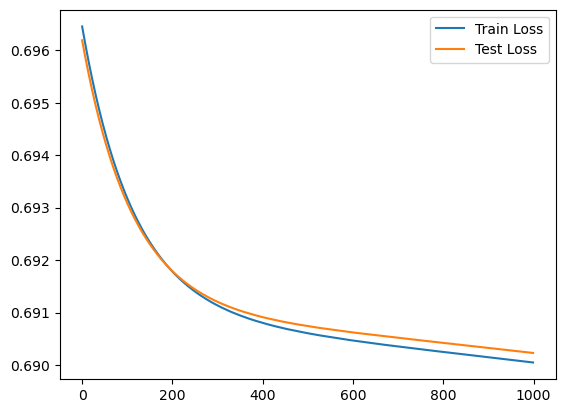

F1:0.691115671530004
Accuracy:0.5313522727272727
Confusion Matrix:
[[ 1243 81631]
 [  851 92275]]


In [5]:
# Create the model
hidden_size = 30
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Epoch 1/1000, Train Loss: 0.691444456577301, Test Loss: 0.691550076007843
Epoch 2/1000, Train Loss: 0.6911982297897339, Test Loss: 0.6913080215454102
Epoch 3/1000, Train Loss: 0.6909741759300232, Test Loss: 0.6910825967788696
Epoch 4/1000, Train Loss: 0.6907639503479004, Test Loss: 0.6908650994300842
Epoch 5/1000, Train Loss: 0.6905580163002014, Test Loss: 0.6906484365463257
Epoch 6/1000, Train Loss: 0.690350353717804, Test Loss: 0.6904289722442627
Epoch 7/1000, Train Loss: 0.6901375651359558, Test Loss: 0.6902058720588684
Epoch 8/1000, Train Loss: 0.6899176239967346, Test Loss: 0.68997722864151
Epoch 9/1000, Train Loss: 0.6896906495094299, Test Loss: 0.6897420287132263
Epoch 10/1000, Train Loss: 0.6894565224647522, Test Loss: 0.6894993185997009
Epoch 11/1000, Train Loss: 0.689214825630188, Test Loss: 0.6892493963241577
Epoch 12/1000, Train Loss: 0.688965380191803, Test Loss: 0.6889917254447937
Epoch 13/1000, Train Loss: 0.688707709312439, Test Loss: 0.6887239813804626
Epoch 14/1000, T

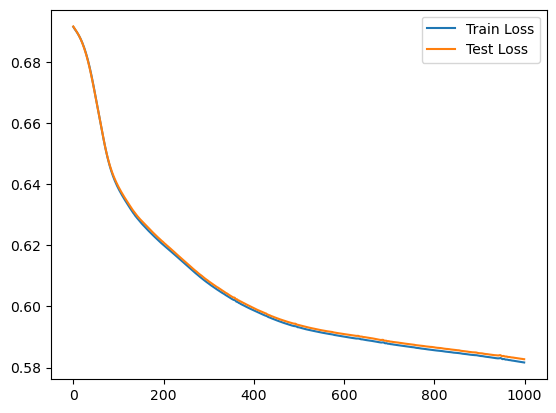

F1:0.726635588450797
Accuracy:0.7074659090909091
Confusion Matrix:
[[56086 26788]
 [24698 68428]]


In [6]:
# Create the model
hidden_size = 30
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Epoch 1/100, Train Loss: 0.6917847394943237, Test Loss: 0.690656304359436
Epoch 2/100, Train Loss: 0.6907647252082825, Test Loss: 0.6890964508056641
Epoch 3/100, Train Loss: 0.6894295811653137, Test Loss: 0.6874492168426514
Epoch 4/100, Train Loss: 0.6881676316261292, Test Loss: 0.685097336769104
Epoch 5/100, Train Loss: 0.6862054467201233, Test Loss: 0.682166337966919
Epoch 6/100, Train Loss: 0.6837232708930969, Test Loss: 0.6786639094352722
Epoch 7/100, Train Loss: 0.681274950504303, Test Loss: 0.674452543258667
Epoch 8/100, Train Loss: 0.6781654953956604, Test Loss: 0.6697661280632019
Epoch 9/100, Train Loss: 0.6748629808425903, Test Loss: 0.6648595929145813
Epoch 10/100, Train Loss: 0.6715644001960754, Test Loss: 0.6611517667770386
Epoch 11/100, Train Loss: 0.6696828603744507, Test Loss: 0.6611748337745667
Epoch 12/100, Train Loss: 0.6697683930397034, Test Loss: 0.6561025381088257
Epoch 13/100, Train Loss: 0.6661772727966309, Test Loss: 0.6549273729324341
Epoch 14/100, Train Loss: 

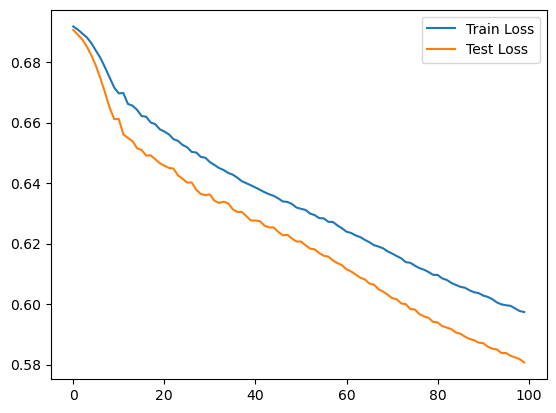

F1:0.7100413529848372
Accuracy:0.68925
Confusion Matrix:
[[54344 28530]
 [26162 66964]]


In [8]:
# Now lets see how our mach2 model does
# Set the size for four hidden layers and the dropout rate
model2 = mlp.MLP_mach2(28, 300, 220, 140, 80, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
# Lower learning rate with the adam optimizeer made the models accuracy better by over 10%
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)
# Only trained for 100 epochs because it will be too slow otherwise. We can see that the training and testing losses are still decreasing
# so, we can use the same hyperparameters and train for more epochs on the GPU.
n_epochs = 100
# Train the model using our function
train_losses, test_losses = mlp.train_model(model2, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model2, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Once the models I was testing got as big as the one above I moved to training using slurm jobs on City's Hyperion. This also allowed me to use a larger amount of training data.